In [ ]:
import xlrd
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
# filter band pass
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    y = signal.lfilter(b, a, data)
    return y

In [ ]:
# FIR low pass zero-phase filter (?)
def zero_phase_filter(data, cutoff, sampling_rate):
    nfreq = cutoff/(0.5*sampling_rate)
    taps =  sampling_rate + 1
    a = 1
    b = signal.firwin(taps, cutoff=nfreq)
    firstpass = signal.lfilter(b, a, data)
    secondpass = signal.lfilter(b, a, firstpass[::-1])[::-1]
    return secondpass

In [ ]:
# maxima
def find_maxima(time, data):
    tmx = []
    dmx = []
    for i in range(len(data)-1):
        if i > 0:
            if data[i] > data[i-1] and data[i] > data[i+1]:
                dmx.append(data[i])
                tmx.append(time[i])
    return tmx, dmx

In [ ]:
# baca file xls
scg = [xlrd.open_workbook("jantung1.xls"), xlrd.open_workbook("jantung2.xls"), xlrd.open_workbook("jantung3.xls"), 
        xlrd.open_workbook("jantung4.xls"), xlrd.open_workbook("jantung5.xls")]
dat = [scg[j].sheet_by_name("Raw Data") for j in range(len(scg))]

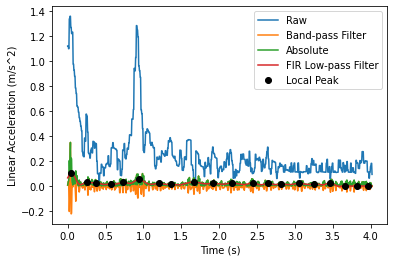

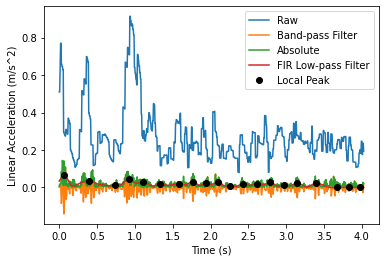

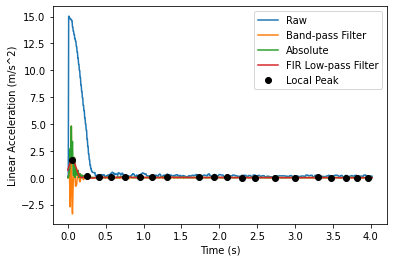

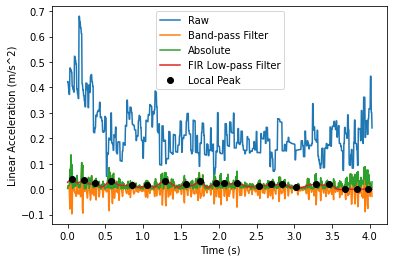

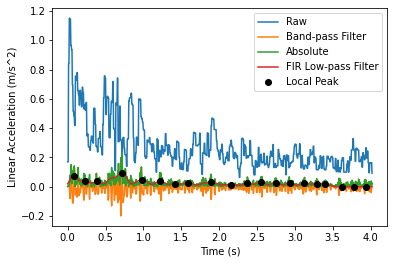

In [ ]:
x = []
y = []
for i in range(len(dat)):
    x.append(([dat[i].cell_value(j, 0) for j in range(1, 800)]))
    y.append(([dat[i].cell_value(j, 4) for j in range(1, 800)]))

# plot raw data dan filtered data
lowcut = 20
highcut = 50
cutoff = 6.7 # frekuensi cutoff
fs = 200    # sampling rate
order = 5
for i in range(len(x)):
    plt.figure(i+1)
    plt.plot(x[i], y[i], label='Raw') # plot data asli
    plt.ylabel("Linear Acceleration (m/s^2)")
    bpf = bandpass_filter(y[i], lowcut, highcut, fs)
    plt.plot(x[i], bpf, label='Band-pass Filter')
    plt.xlabel("Time (s)")
    abpf = [abs(j) for j in bpf]
    plt.plot(x[i], abpf, label='Absolute')
    zpf = zero_phase_filter(abpf, cutoff, fs)
    plt.plot(x[i], zpf, label='FIR Low-pass Filter')
    t,d = find_maxima(x[i], zpf)
    plt.plot(t,d, 'ko', label='Local Peak')
    plt.legend()

plt.show()

In [ ]:
def find_threshold():
  array_max = []
  array_max.append(find_maxima(x[i], zpf))
  max_t , max_d = array_max[0]
  jml_t = 0
  jml_d = 0
  for t in max_t:
    jml_t += t
  for d in max_d:
    jml_d += d
  avg_t = jml_t/len(max_t)
  avg_d = jml_d/len(max_d)
  return avg_t, avg_d
# def find_threshold(l, N):
#     sum = 0
#     result = list( 0 for x in l)
 
#     for i in range( 0, N ):
#         sum = sum + l[i]
#         result[i] = sum / (i+1)
 
#     for i in range( N, len(l) ):
#         sum = sum - l[i-N] + l[i]
#         result[i] = sum / N
 
#     return result

In [ ]:
hasil = find_threshold()
hasil

(2.1212570185999997, 0.030587247759143083)

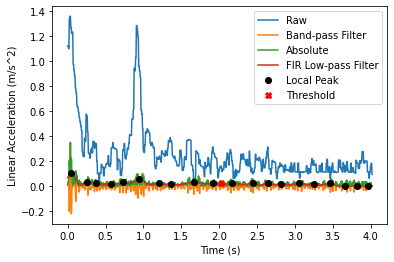

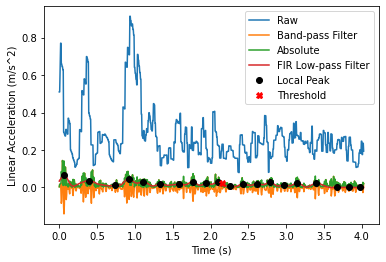

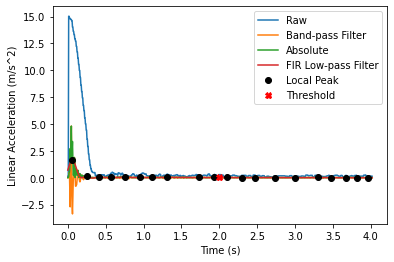

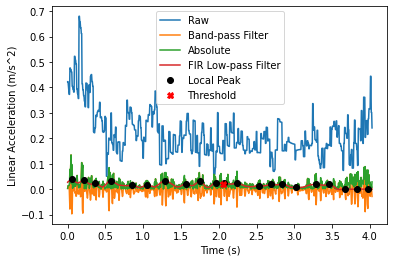

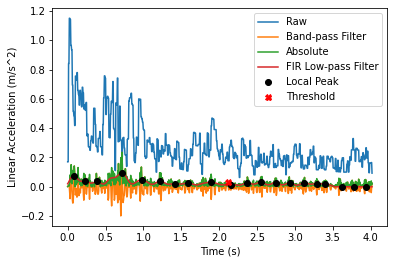

In [ ]:
for i in range(len(x)):
    plt.figure(i+1)
    plt.plot(x[i], y[i], label='Raw') # plot data asli
    plt.ylabel("Linear Acceleration (m/s^2)")
    bpf = bandpass_filter(y[i], lowcut, highcut, fs)
    plt.plot(x[i], bpf, label='Band-pass Filter')
    plt.xlabel("Time (s)")
    abpf = [abs(j) for j in bpf]
    plt.plot(x[i], abpf, label='Absolute')
    zpf = zero_phase_filter(abpf, cutoff, fs)
    plt.plot(x[i], zpf, label='FIR Low-pass Filter')
    t,d = find_maxima(x[i], zpf)
    plt.plot(t,d, 'ko', label='Local Peak')
    # plt.legend()
    t_t, t_d = find_threshold()
    plt.plot(t_t, t_d, 'rX', label ='Threshold')
    # threshold = find_threshold(x[i], zpf)
    # plt.plot(threshold, 'rX', label ='Threshold')
    plt.legend()

plt.show()


In [ ]:
def find_systolAO():
  systol_t = []
  systol_d = []
  threshold = []
  array_max = []
  threshold.append(find_threshold())
  threshold_t, threshold_d = threshold[0]
  array_max.append(find_maxima(x[i], zpf))
  max_t , max_d = array_max[0]
  for t in max_t:
    if t > threshold_t:
      systol_t.append(t)
  for d in max_d:
    if d > threshold_d:
      systol_d.append(d)
  if len(systol_t) > len(systol_d):
     while len(systol_t) > len(systol_d):
      systol_t[0:1]=[]
  if len(systol_d) > len(systol_t):
     while len(systol_d) > len(systol_t):
      systol_d[0:1]=[]
  #   return systol_t, systol_d
  # else:
  #   while len(systol_t) > len(systol_d):
  #     systol_t[0:1]=[]
  return systol_t, systol_d

In [ ]:
hasil = find_systolAO()
hasil

([2.7461242670000003,
  2.9324645990000002,
  3.123748779,
  3.289916992,
  3.395690918,
  3.6275024410000003,
  3.7783813470000003,
  3.939880371],
 [0.07678768832445927,
  0.04049508720050533,
  0.03649327887958039,
  0.095900787501744,
  0.047566897329442574,
  0.0392777997452013,
  0.031024514042885767,
  0.0316447799219894])

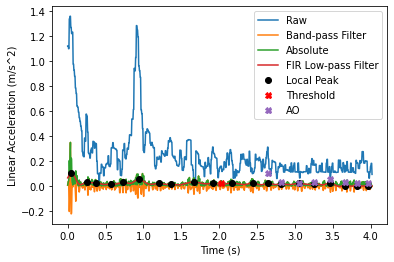

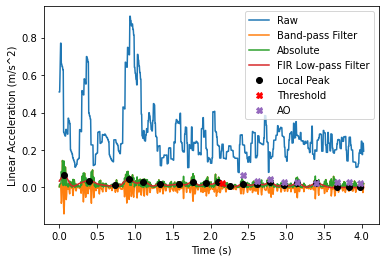

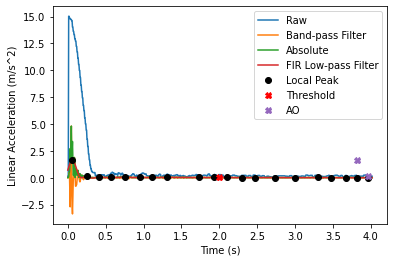

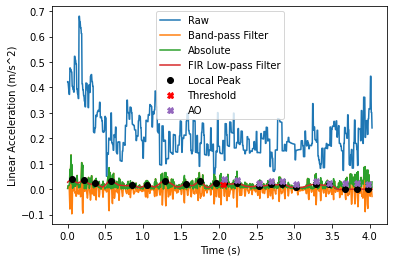

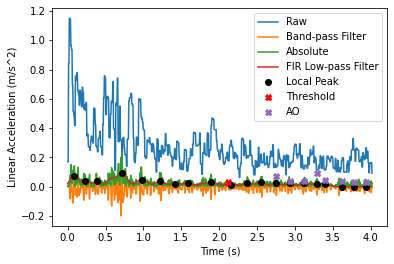

In [ ]:
for i in range(len(x)):
    plt.figure(i+1)
    plt.plot(x[i], y[i], label='Raw') # plot data asli
    plt.ylabel("Linear Acceleration (m/s^2)")
    bpf = bandpass_filter(y[i], lowcut, highcut, fs)
    plt.plot(x[i], bpf, label='Band-pass Filter')
    plt.xlabel("Time (s)")
    abpf = [abs(j) for j in bpf]
    plt.plot(x[i], abpf, label='Absolute')
    zpf = zero_phase_filter(abpf, cutoff, fs)
    plt.plot(x[i], zpf, label='FIR Low-pass Filter')
    t,d = find_maxima(x[i], zpf)
    plt.plot(t,d, 'ko', label='Local Peak')
    # plt.legend()
    t_t, t_d = find_threshold()
    plt.plot(t_t, t_d, 'rX', label ='Threshold')
    AO_t, AO_d = find_systolAO()
    plt.plot(AO_t, AO_d, 'X', label = 'AO')
    plt.legend()

plt.show()